# Pymaceuticals Inc.
---

## Analysis

### Drug Regimen Comparison
Comparing all nine drug treatments, along with placebo, shows that Capomulin and Ramicane had a longer survival rate when compared to the other drugs tested.  The remaining drugs had a similar survival rate as compared to placebo, suggesting that they may be ineffective for treating squamous cell carcinoma (SCC).

![Treatments By Timepoints](images\TreatmentTimepoints.png)
---

### Study Balance
The study maintained a balanced design, testing approximately 25 mice with each drug regimen. This ensures the reliability of our analysis by minimizing potential biases associated with uneven group sizes.

![Number of Mice Studied by Drug](images\MiceStudiedPerDrug.png)
---

Additionally, we examined the gender distribution of mice in our study and found a nearly identical balance between male and female mice. Based on this balanced sampling, we assume that gender is not a significant factor influencing the study outcomes.

![Mice by Gender](images\MiceByGender.png)
---

### Data Distribution of Tumor Volume
With Capomulin and Ramicane as the drugs of interest, we examined the distribution of tumor volume in comparison to Infubinol and Ceftamin. Both Capomulin and Ramicane exhibited similar results, showing no outliers. However, a closer look reveals that Capomulin demonstrates more consistent results, as evidenced by closely distributed inner quartile values. Additionally, the distribution of results for Capomulin appears less skewed compared to Ramicane.

![Distribution of Tumor Volume by Drug](images\TumorVolumeByDrug.png)

### Capomulin Response Sample
We can look closer at the response individual subject (mouse l509) to Capomulin drug treatment.  The tumor volume starts at 45 (mm3) at the beginning of the treatment.  It continues to grow for the first 20 days while the drug is administered, but shows 8% decrease in volume over the remainder of the treatment.

![Capomulin Treatment of Mouse l509](images\CapomulinTreatmentMouse-l509.png)
---

### Capomulin:  Correlation Between Mouse Weight & Average Tumor Volume
There is a strong correlation (.84) between mouse weight and average tumor volume, suggesting that weight of the mouse may impact the effectiveness of Capomulin drug treatment.  This should be considered when evaluating the overall efficacy of the drug.

![Capomulin:  Average Tumor Volume by Weight](images\CapomulinAvgTumorVolumeByWeight.png)

### Conclusion
Capomulin demonstrates promising outcomes in treating squamous cell carcinoma (SCC) in mice over a 45-day trial.  It is worth noting that Ramicane has also showed similar results.  Further exploration through additional testing of both Capomulin and Ramicane is reccomended to ascertain potential differences in effectiveness. A larger sample size and an extended study duration would contribute valuable insights to better determine the comparative efficacy of these drugs.



 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import dataframe_image as dfi

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left" )


# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates_df = mouse_study_df[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice = duplicates_df["Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mice)]
duplicate_mice_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Makes a new dataframe that excludes any mice in the duplicate_mice list.  The tilda (~) inverses the booleen, which in essense returns everything except the mice in the duplicate_mice list.
mouse_study_cleaned_df = mouse_study_df[~mouse_study_df['Mouse ID'].isin(duplicate_mice)]
mouse_study_cleaned_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_study_cleaned_df["Mouse ID"].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_summary = pd.DataFrame(mouse_study_cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
regimen_summary = regimen_summary.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
regimen_summary["Median Tumor Volume"] = mouse_study_cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_summary["Tumor Volume Variance"] = mouse_study_cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_summary["Tumor Volume Std. Dev."] = mouse_study_cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_summary["Tumor Volume Std. Err."] = mouse_study_cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary = mouse_study_cleaned_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

# If I wanted to rename the columns to match previous sample.
# regimen_summary = regimen_summary.rename(columns={"mean": "Mean Tumor Volume",
#                                                   "median": "Median Tumor Volume",
#                                                   "var": "Tumor Volume Variance",
#                                                   "std": "Tumor Volume Std. Dev.",
#                                                   "sem": "Tumor Volume Std. Err."})
regimen_summary



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
# Checking to see if the number of mice tested is consistant between each of the drug regimen studies.  Not apart of the assignment, but used in my analysis.
mouse_count_per_drug = pd.DataFrame(mouse_study_cleaned_df.groupby(["Drug Regimen"])["Mouse ID"].nunique())
mouse_count_per_drug= mouse_count_per_drug.rename(columns={"Mouse ID" : "# of Mice Studied"})
mouse_count_per_drug.dfi.export("images/MiceStudiedPerDrug.png")



## Bar and Pie Charts

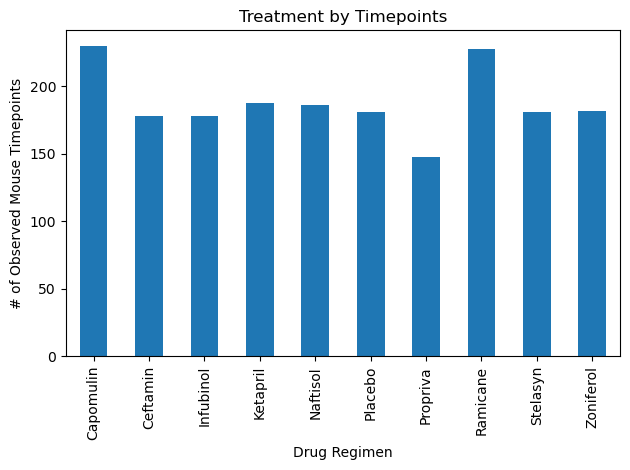

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_treatment_df = pd.DataFrame(mouse_study_cleaned_df.groupby(["Drug Regimen"])["Mouse ID"].count())
mouse_treatment_df.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", rot=90, legend=False, title="Treatment by Timepoints")

# Format Chart
plt.tight_layout()

plt.show()


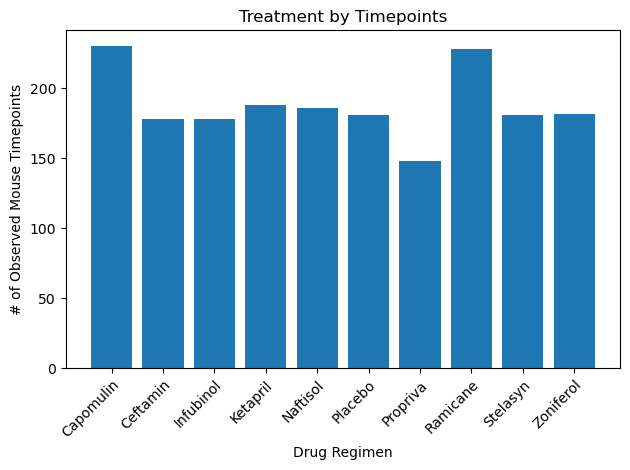

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_points = np.arange(len(mouse_treatment_df.index))
point_locations = [value for value in x_points]

plt.bar(x_points, mouse_treatment_df["Mouse ID"])

# Format Chart
plt.xticks(point_locations, mouse_treatment_df.index, rotation=45, ha="right", rotation_mode="anchor" )
plt.title("Treatment by Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()


# Save Image
plt.savefig("images/TreatmentTimepoints.png")

plt.show()



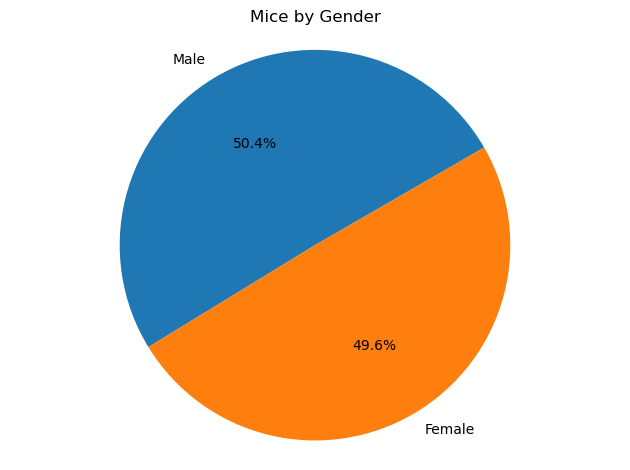

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create dataframe that drops all the duplicate Mouse IDs and only keeps Mouse ID and Sex columns.
mouse_gender = mouse_study_cleaned_df.drop_duplicates(subset=["Mouse ID"], keep="first")[["Mouse ID", "Sex"]]

# Dataframe on gender & counts for plotting
mouse_gender_counts = mouse_gender["Sex"].value_counts()

# Create Mice by Gender pie chart
mouse_gender_counts.plot(kind="pie", autopct="%1.1f%%", ylabel="", title="Mice by Gender", startangle=30)

plt.axis("equal")
plt.tight_layout()
plt.show()



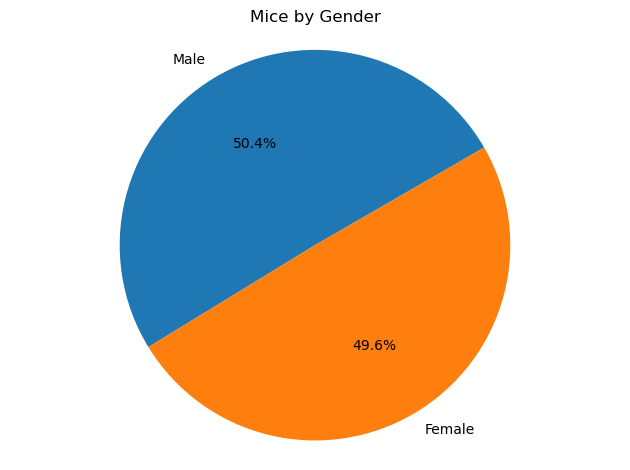

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Use mouse_gender_counts dataframe generated above to create pie chart
mouse_gender_counts = mouse_gender_counts.reset_index()

# Create Mice by Gender pie chart
plt.pie(mouse_gender_counts["count"], labels=mouse_gender_counts["Sex"], autopct="%1.1f%%", startangle=30)

# Format Chart
plt.title("Mice by Gender")
plt.axis("equal")
plt.tight_layout()

# Save Image
plt.savefig("images/MiceByGender.png")

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = pd.DataFrame(mouse_study_cleaned_df.groupby(["Mouse ID"])["Timepoint"].max())
last_timepoint


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, mouse_study_cleaned_df, on=["Mouse ID", "Timepoint"], how="inner").reset_index(drop=True)
final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_treatments:
    drug_dict={}
    outlier_count = 0

    # Gets tumor volumes from mice on a specific drug treatment
    tumor_values = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == drug, :]["Tumor Volume (mm3)"]

    # Adds series to a list
    tumor_volumes.append(tumor_values)


    # Determine outliers using upper and lower bounds

    # Calculate Outliers for the drug.
    quartiles = tumor_values.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    lower_bound = lowerq-(1.5*iqr)
    upper_bound = upperq+(1.5*iqr)

    for value in tumor_values:
        if value < lower_bound or value > upper_bound:
            outlier_count +=1

  
    # Prints a report for the drug.

    print(f"----- {drug}  -----")
    print(f"IRQ:  {iqr}")
    print(f"Lower Bound:  {lower_bound}")
    print(f"Upper Bound:  {upper_bound}")
    print(f"Number of outliers:  {outlier_count}")
    print("")

    # add subset 

----- Capomulin  -----
IRQ:  7.781863460000004
Lower Bound:  20.70456164999999
Upper Bound:  51.83201549
Number of outliers:  0

----- Ramicane  -----
IRQ:  9.098536719999998
Lower Bound:  17.912664470000003
Upper Bound:  54.30681135
Number of outliers:  0

----- Infubinol  -----
IRQ:  11.477135160000003
Lower Bound:  36.83290494999999
Upper Bound:  82.74144559000001
Number of outliers:  1

----- Ceftamin  -----
IRQ:  15.577752179999997
Lower Bound:  25.355449580000002
Upper Bound:  87.66645829999999
Number of outliers:  0



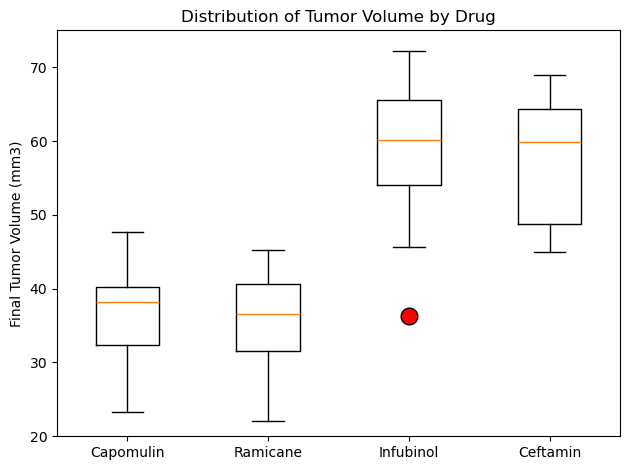

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create Box Plot
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volumes, labels=drug_treatments, flierprops=dict(markerfacecolor='red', marker='o', markersize=12))


# Format Chart
plt.ylim(20, 75)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume by Drug")
plt.tight_layout()

# Save Image
plt.savefig("images/TumorVolumeByDrug.png")

plt.show()


## Line and Scatter Plots

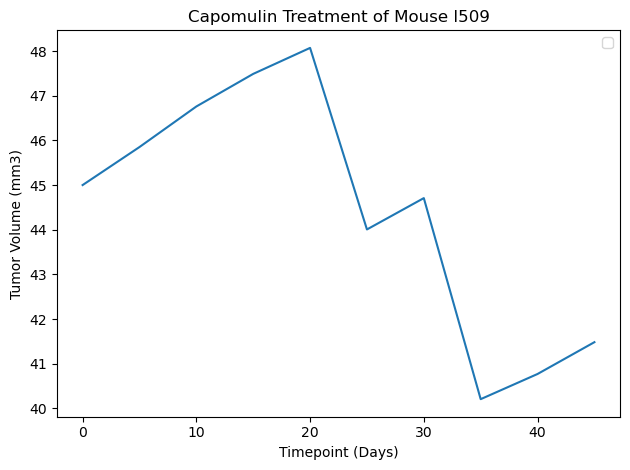

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Create DF that isolates mouse ID and returns timepoint and tumor volume
mouse_id = "l509"
mouse_results = mouse_study_cleaned_df.loc[mouse_study_cleaned_df["Mouse ID"]== mouse_id, ["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint")
mouse_results_treatment = mouse_study_cleaned_df.loc[mouse_study_cleaned_df["Mouse ID"]== mouse_id, :]["Drug Regimen"].reset_index(drop=True)  # Returns the drug used for the mouse treatment for the title of the chart.

# Create Line Chart
mouse_results.plot(kind="line")

# Format Chart
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"{mouse_results_treatment[0]} Treatment of Mouse {mouse_id}")
plt.legend(labels=[])
plt.tight_layout()

# Save Image
plt.savefig(f"images/{mouse_results_treatment[0]}TreatmentMouse-{mouse_id}.png")

plt.show()


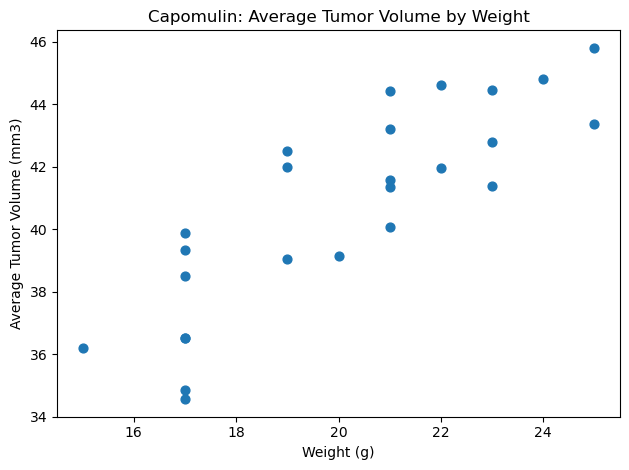

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Create DF that averages tumor volume by mouse ID and weight
drug_regimen = "Capomulin"
drug_regimen_results = mouse_study_cleaned_df.loc[mouse_study_cleaned_df["Drug Regimen"]== drug_regimen, ["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]].reset_index(drop=True)
drug_regimen_results = drug_regimen_results.groupby("Mouse ID").mean()

# Create Scatter Plot
drug_regimen_results.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=40)

# Format Chart
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"{drug_regimen}: Average Tumor Volume by Weight")
plt.tight_layout()



plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


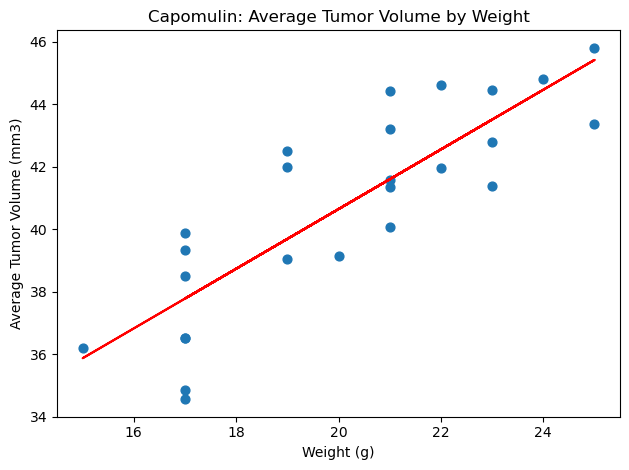

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Findes correlation coefficient and returns result
correlation = st.pearsonr(drug_regimen_results["Weight (g)"], drug_regimen_results["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


# Calculate regression line
x_values = drug_regimen_results["Weight (g)"]
y_values = drug_regimen_results["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


# Create Scatter Plot with Liniar Regression
drug_regimen_results.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=40)
plt.plot(x_values,regress_values,"r-")


# Format Chart
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"{drug_regimen}: Average Tumor Volume by Weight")
plt.tight_layout()

# Save Image
plt.savefig(f"images/{drug_regimen}AvgTumorVolumeByWeight.png")

plt.show()

